In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-05-13  583.492615  585.719828  579.515431  580.082127  67947200   
2025-05-14  584.238342  585.620367  582.199987  584.457058  66283500   
2025-05-15  587.091919  587.598959  581.762447  582.219845  71268100   
2025-05-16  590.810547  591.108823  585.918629  587.877362  76052100   
2025-05-19  591.456848  592.142915  584.745351  584.745351  68168500   

Price           12_ema      27_ema      MACD    Signal  MACD_hist  Strategy  \
Date                                                                          
2025-05-13  583.492615  583.492615  0.000000  0.000000   0.000000        -1   
2025-05-14  583.896550  583.879288  0.017262  0.009590   0.007672         1   
2025-05-15  585.143704  585.030432  0.113272  0.052083   0.061189         1   
2025-05-16  586.932505  586.639832  0.292673  0.133583   0.159089         1   
2025-05-19  588.16175


/var/folders/l5/c_3lyttx6g5b5rwsc34n96pr0000gn/T/ipykernel_13124/3289127347.py:22: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('MACD', 'Signal')


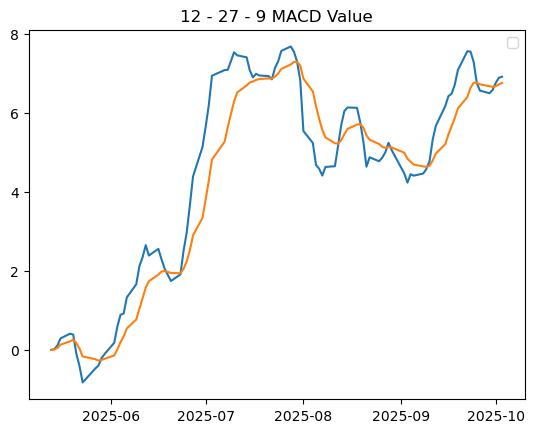

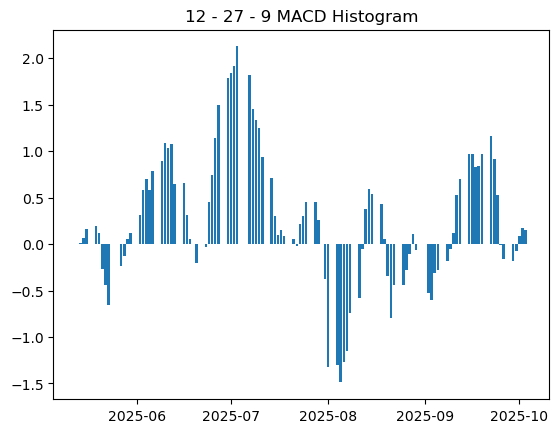

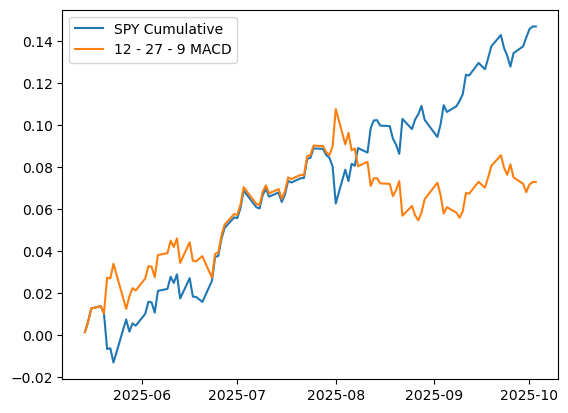

In [63]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 100

def get_data(ticker = TICKER):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)
    #only return the subset of data im interested in
    return df.iloc[-LOOKBACK:,:]
def add_MACD(df, macd_fast=MACD_FAST, macd_slow = MACD_SLOW, span = MACD_SPAN):
    df[f'{macd_fast}_ema'] = df['Close'].ewm(span=macd_fast).mean()
    df[f'{macd_slow}_ema'] = df['Close'].ewm(span=macd_slow).mean()
    #macd line is the difference between the fast and slow
    df['MACD'] = df[f'{macd_fast}_ema'] - df[f'{macd_slow}_ema']
    
    #macd signal is a 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span= span).mean()
    plt.plot(df['MACD'])
    plt.plot(df['Signal'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Value')
    
    #MACD histogram
    df['MACD_hist'] = df['MACD'] - df['Signal']
    plt.figure()
    plt.bar(x=df.index, height = df['MACD_hist'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')
    return df
def strategy(df):
    df['Strategy'] = 0
    df['Strategy']=np.where(df['MACD_hist'] >0,1,-1)
    return df
def test_strategy(df):
    df['Asset_Returns'] = (1+ df['Close'].pct_change()).cumprod()-1
    df['Strategy_Returns']= (1+df['Close'].pct_change()*df['Strategy']).cumprod()-1
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative',f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD' ])
    return df
def main ():
    df = get_data()
    df = add_MACD(df)
    df = strategy (df)
    df = test_strategy(df)
    print(df.head())
    return df

df = main ()
    


NameError: name 'df' is not defined